In [20]:
import os

import xarray as xr
import matplotlib.pyplot as plt

In [2]:
REPO_ROOT = '/Users/rwegener/repos/chesapeake_mhw'

In [6]:
path = os.path.join(
    REPO_ROOT, 'data/raw', 
    'L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0_CB_20020901_20230831.nc'
)
geopolar = xr.open_dataset(path).analysed_sst

In [16]:
path = os.path.join(
    REPO_ROOT, 'data/interim', 
    'geopolar_climatology_chesapeake.nc'
)
clim = xr.open_dataset(path).climatology

In [25]:
anom = geopolar - clim

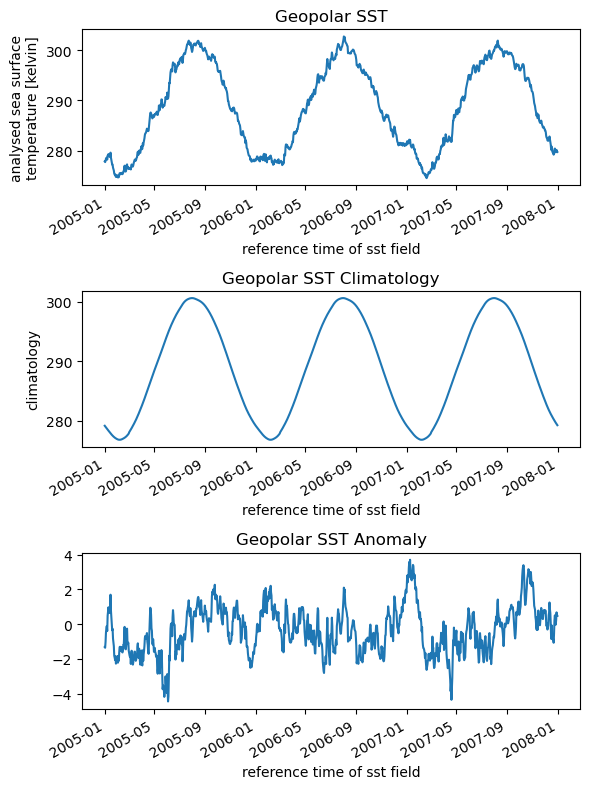

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_size_inches(6, 8)

geopolar.sel(time=slice('2005', '2007')).isel(lat=25, lon=25).plot(ax=ax1)
ax1.set_title('Geopolar SST')

clim.sel(time=slice('2005', '2007')).isel(lat=25, lon=25).plot(ax=ax2)
ax2.set_title('Geopolar SST Climatology')

anom.sel(time=slice('2005', '2007')).isel(lat=25, lon=25).plot(ax=ax3)
ax3.set_title('Geopolar SST Anomaly')

plt.tight_layout()


In [40]:
one_pixel = anom.sel(lat=25, lon=25, method='nearest')

(array([10., 12., 16., 42., 65., 81., 84., 77., 80., 54., 61., 37., 10.,
         6.,  3.,  3.,  2.,  2.,  1.,  2.]),
 array([-4.2804659 , -3.71439477, -3.14832365, -2.58225253, -2.0161814 ,
        -1.45011028, -0.88403916, -0.31796804,  0.24810309,  0.81417421,
         1.38024533,  1.94631645,  2.51238758,  3.0784587 ,  3.64452982,
         4.21060095,  4.77667207,  5.34274319,  5.90881431,  6.47488544,
         7.04095656]),
 <BarContainer object of 20 artists>)

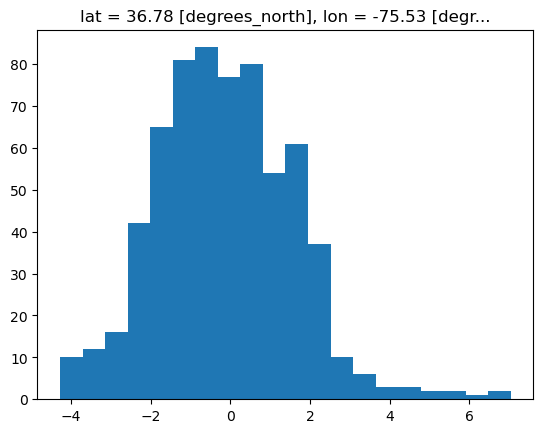

In [41]:
one_pixel.sel(time=one_pixel.time.dt.month==3).plot.hist(bins=20)

(array([1., 1., 0., 3., 3., 2., 0., 0., 3., 2., 1., 0., 1., 1., 2., 0., 0.,
        0., 0., 1.]),
 array([-2.9081603 , -2.55066061, -2.19316091, -1.83566122, -1.47816152,
        -1.12066183, -0.76316213, -0.40566244, -0.04816274,  0.30933695,
         0.66683665,  1.02433634,  1.38183604,  1.73933573,  2.09683543,
         2.45433512,  2.81183482,  3.16933451,  3.5268342 ,  3.8843339 ,
         4.24183359]),
 <BarContainer object of 20 artists>)

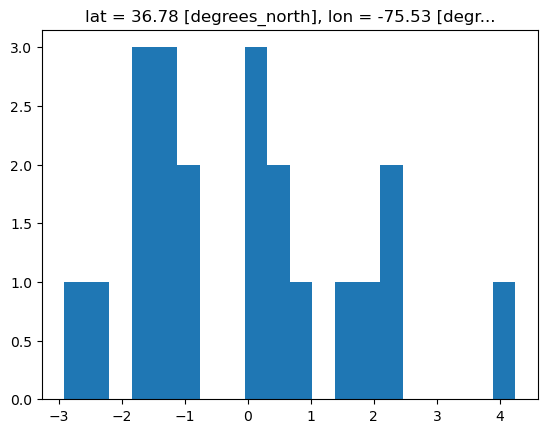

In [42]:
one_pixel.sel(time=((one_pixel.time.dt.month==3) & (one_pixel.time.dt.day==15))).plot.hist(bins=20)